# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import pandas as pd
from PIL import Image
import os

Load ResNet & VGG Models

In [2]:
import torchvision.models as models

# Load ResNet
resnet50 = models.resnet50(pretrained=True)

C:\Users\mekae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mekae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Format & Preprocess Data

In [3]:
df = pd.read_csv("./AffectNet Dataset/labels.csv")

In [4]:
df

Unnamed: 0                        pth     label    relFCs
0               0     anger/image0000006.jpg  surprise  0.873142
1               1     anger/image0000060.jpg     anger  0.852311
2               2     anger/image0000061.jpg     anger  0.800957
3               3     anger/image0000066.jpg   disgust  0.843079
4               4     anger/image0000106.jpg     anger  0.849108
...           ...                        ...       ...       ...
28170       28170  surprise/image0034960.jpg  surprise  0.825263
28171       28171  surprise/image0034961.jpg  surprise  0.738646
28172       28172  surprise/image0034966.jpg  surprise  0.774524
28173       28173  surprise/image0034973.jpg   neutral  0.766952
28174       28174  surprise/image0042075.jpg   disgust  0.832160

[28175 rows x 4 columns]

In [5]:
def getFileExtension(sentiment):
    if sentiment in jpgList:
        return "jpg"
    if sentiment in pngList:
        return "png"

jpgList = ['anger','fear','sad']
pngList = ['contempt','disgust','happy','neutral','surprise']

imageRootPath = "./AffectNet Dataset/"
imageFilePath = "happy/ffhq_34.png"
imagePath = imageRootPath + imageFilePath

image = Image.open(imagePath).convert("RGB")
image

transform = transforms.Compose([
    transforms.Resize((256)),
    transforms.CenterCrop((224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

imageTensor = transform(image)
imageTensor = imageTensor.unsqueeze(0)

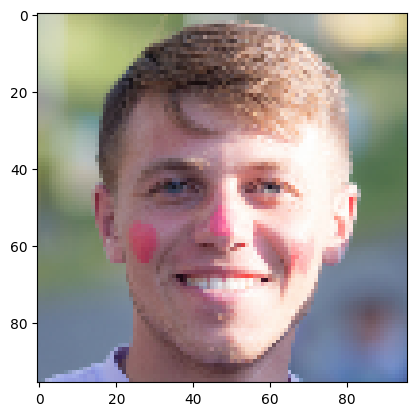

In [6]:
plt.imshow(image)

# Dataset

In [7]:
library = []

In [9]:
count = 0
n = 10

for folder in os.listdir(imageRootPath):
    if folder == "labels.csv":
        continue
    for image in os.listdir(imageRootPath + folder):
        # if count == n:
            # break
        label = df[df['pth'] ==  folder + '/' + image]['label']
        library.append((image,label))

        count += 1

# print(library[:5])
# for ind, label in enumerate()

In [ ]:
print(library)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class FacialSentimentDataset(Dataset):
    def __init__(self, path, transform):
        # Library has entires in the form of tuples
        # Each tuple has the image path at the 0th index
        # and the label at the 1st
        self.path = path
        self.library = []
        self.transform = transform

        # Get each folder in the dataset
        for folder in os.listdir(path):
            # Skip labels file
            if folder == "labels.csv":
                continue
            # Get each image in each folder
            for image in os.listdir(path + folder):
                # Get image's corresponding label
                try:
                    label = df[df['pth'] ==  folder + '/' + image]['label'].item()
                    self.library.append((folder + '/' + image,label))
                # Skip images that are not labeled
                except ValueError as e:
                    continue
        
    # Add get dataset's length function
    def __len__(self):
        return len(self.library)

    # Add get item at index from dataset
    def __getitem__(self,idx):
        # Get image path from library at an index
        imagePath = self.library[idx][0]
        # Open image with PIL
        image = Image.open(self.path + imagePath).convert("RGB")
        # Get label path from library at an index
        label = self.library[idx][1]

        # Apply given transform to each image
        if self.transform:
            image = self.transform(image)

        return image,label


dataset = FacialSentimentDataset("./AffectNet Dataset/", transform)

In [ ]:
for x in dataset:
    print(x)

In [ ]:
resnet50.eval();
with torch.no_grad():
    output = resnet50(imageTensor)

Train

In [59]:
from pytorch_lightning import Trainer
numEpochs = 15

model = resNet()

trainer = Trainer(numEpochs, gpus=0)

In [ ]:
trainer.fit(model, trainDataloader, valDataloader)